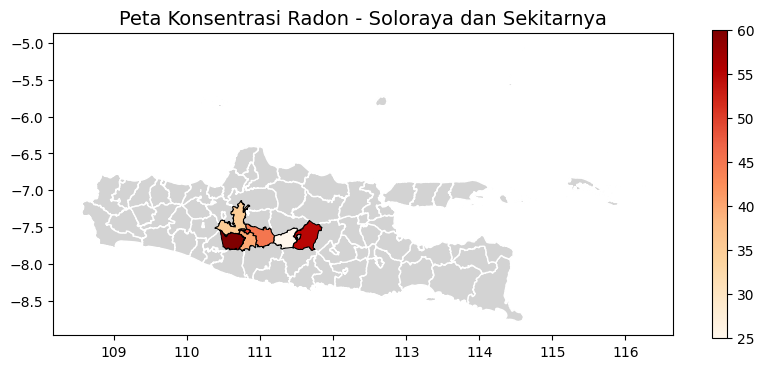

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca GeoJSON seluruh Indonesia
gdf_all = gpd.read_file("all_kabkota_ind.geojson")

# 2. Ambil hanya Jawa Tengah & Jawa Timur
provinsi_jateng_jatim = ['JAWA TENGAH', 'JAWA TIMUR','DAERAH ISTIMEWA YOGYAKARTA']
gdf_prov = gdf_all[gdf_all['prov_name'].isin(provinsi_jateng_jatim)]

# 3. Buat GeoDataFrame untuk kota target
target_kota = [
    "KOTA SURAKARTA", "SUKOHARJO", "KLATEN", "BOYOLALI",
    "KARANGANYAR", "MAGETAN", "MADIUN"
]
gdf_target = gdf_prov[gdf_prov['name'].isin(target_kota)]

# 4. Buat data radon (dummy atau dari datamu)
radon_data = pd.DataFrame({
    'name': target_kota,
    'radon': [50, 40, 60, 35, 45, 25, 55]
})

# 5. Gabungkan data radon ke gdf_target
gdf_target = gdf_target.merge(radon_data, on='name')

# 6. Plot peta
fig, ax = plt.subplots(figsize=(10, 4))

# Plot background: semua kab/kota Jateng dan Jatim (warna abu-abu)
gdf_prov.plot(ax=ax, color='lightgrey', edgecolor='white')

# Plot target area: dengan warna sesuai konsentrasi radon
gdf_target.plot(column='radon', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True)

# 7. Styling
ax.set_title('Peta Konsentrasi Radon - Soloraya dan Sekitarnya', fontsize=14)
ax.axis('on')  # Hide axis

# 8. Simpan sebagai JPG
plt.savefig("peta_radon.jpg", dpi=300, bbox_inches='tight')
plt.show()


In [16]:
gdf_all['prov_name'].unique()  

array(['ACEH', 'SUMATERA UTARA', 'RIAU', 'JAMBI',
       'DAERAH ISTIMEWA YOGYAKARTA', 'JAWA TIMUR', 'SUMATERA BARAT',
       'Sumatera Barat', 'LAMPUNG', 'JAWA TENGAH', 'SUMATERA SELATAN',
       'BENGKULU', 'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU',
       'DKI JAKARTA', 'JAWA BARAT', 'BANTEN', 'BALI',
       'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT',
       'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR',
       'KALIMANTAN UTARA', 'SULAWESI UTARA', 'SULAWESI TENGAH',
       'Sulawesi Tengah', 'SULAWESI SELATAN', 'SULAWESI TENGGARA',
       'Sulawesi Tenggara', 'GORONTALO', 'SULAWESI BARAT', 'MALUKU',
       'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA'], dtype=object)